# **Lecture 20 - Data Visualization using ggplot2**

---

<br>

### Packages

In [ ]:
# load ggplot2 library (already installed in colab!)
library(ggplot2)

---

<br>

### Data Visualization

* Earlier in the semester, we established the importance of data visualization for understanding distributions and relationships within our dataset

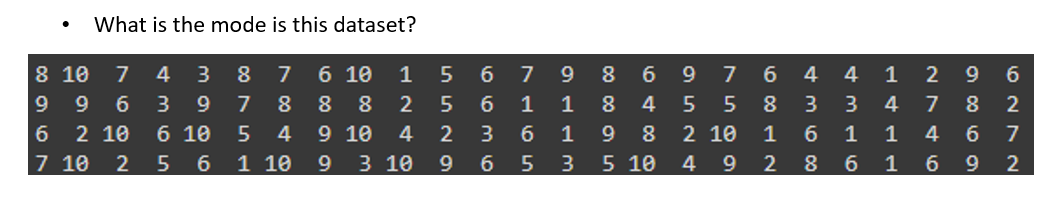

VS

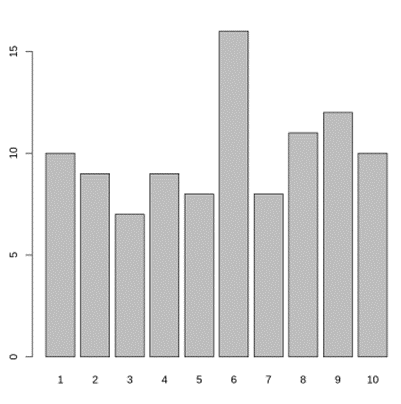

#### Why create plots in base `R`?

* We only covered the most basic plots using base `R` (except for heatmaps)

* Basic plots in `R` are suitable for creating fast visualizations for personal use, requiring minimal syntax

* This is especially useful for a rough exploratory analysis, where the aesthetic appeal is not of immediate importance
  * We just want to understand our data better



#### When to create plots in `ggplot2`?

* If we want to create visualizations that
  * are suitable for an audience (e.g., publications, presentations, reports)
  
   or

  * convey more complex relationships with additional visual dimensions (e.g., shape, color, etc.)

  then we need an alternative!

* The package `ggplot2` is capable of producing beautiful visualizations that convey complex relationships within your data

* Note that base `R` is also capable, but would now require many more lines of code to produce a similar result

---

<br>

### Introducing `ggplot2`

* Plots using the `ggplot2` package have a slightly different syntax than base `R`

* For example, consider the script below, which uses the `ggplot()` function to create a histogram


* We first notice that the plot is more aesthetically appealing than a base `R` histogram using the `hist()` function

* We can also see key components of the `ggplot()` script
  * `ggplot()` - function that creates a `ggplot` object (i.e. initializes a plot) aka an empty plot
  * `data` - data frame containing your dataset
    * In contrast to base `R`, which allows you to plot individual variables (e.g., `hist(mtcars$mpg)`),
    * `ggplot()` requires you plot variables from a specified data frame
  * `aes` - is a function, the aesthetic mapping, which includes the variables we are plotting and many other options (e.g., color, shape, etc.), we can modify more then just variables; we can alter, say, the color or include additional information from other variables.
  * `geom_histogram` - A geometry component specifying the type of plot, which in this case is a histogram.
    * Function arguments (e.g., `bins`) specify attributes of the geometry.
    * Note there are many geomtries, including scatterplots, boxplots etc.

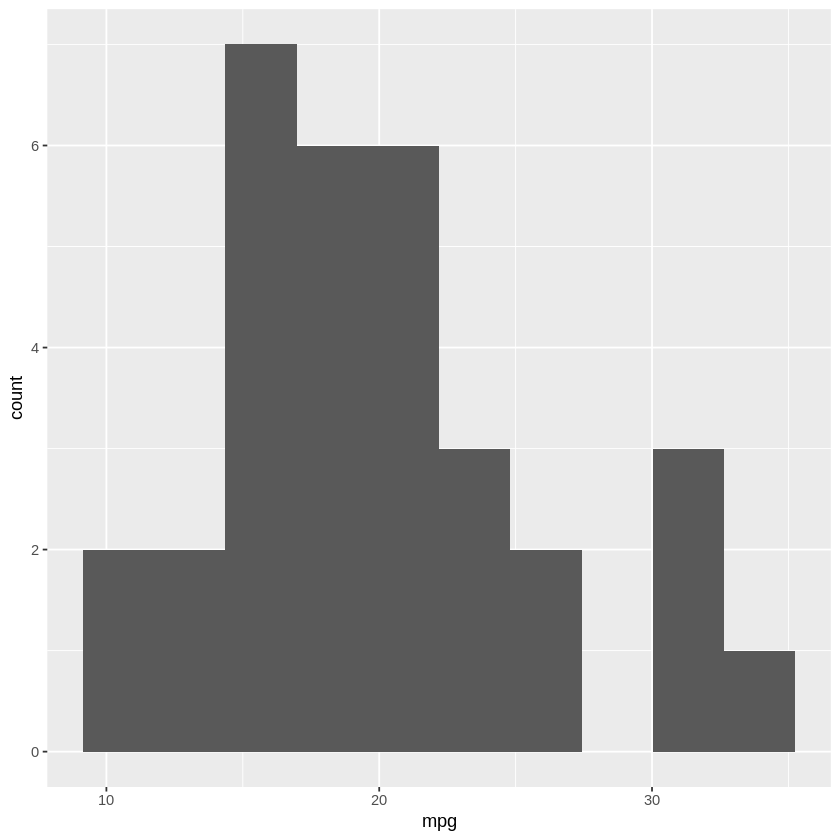

In [ ]:
# create an empty plot

# create a histogram of mpg
ggplot(data = mtcars, aes(x = mpg)) +
  geom_histogram(bins = 10)

#### List of `ggplot2` Geomtries

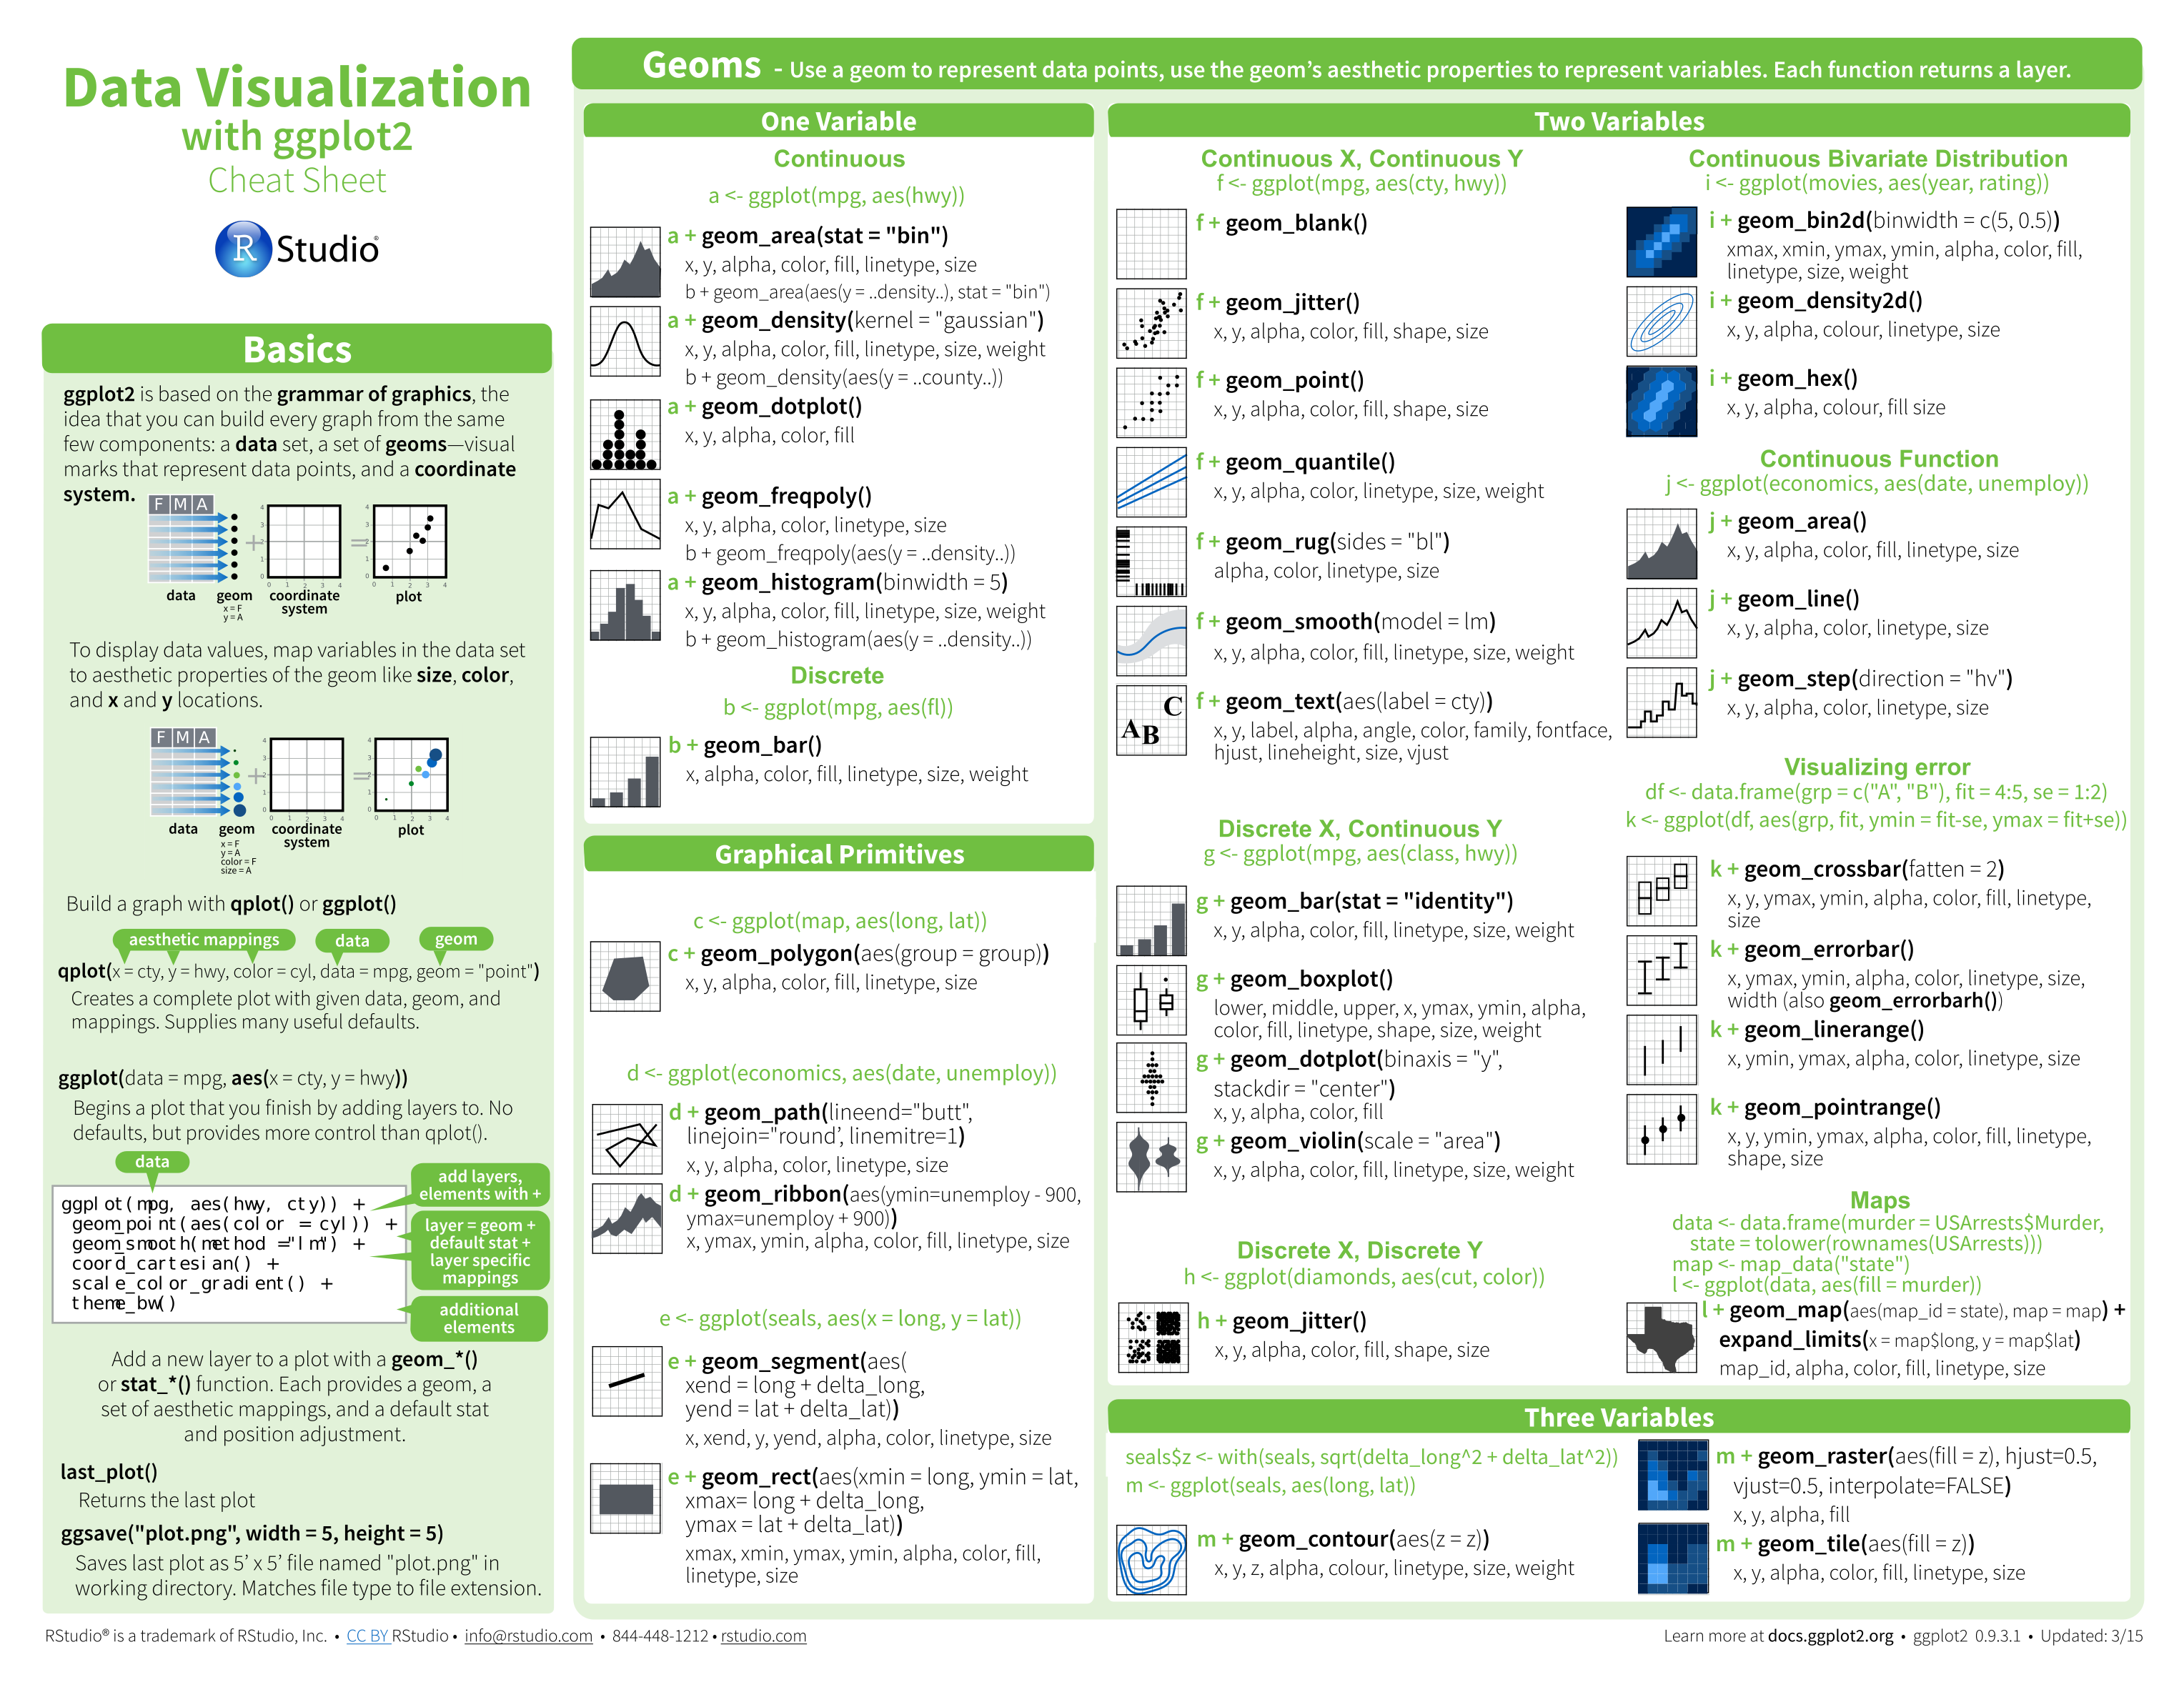

#### Adding Layers to a `ggplot`

* You will also notice the `+` syntax in a `ggplot`
* This is NOT an actual addition operation
* It is the syntax used by the `ggplot2` package to added additional layers to the plot

* For example, we can "add" a title using `labs()`

* More generally, we can add many different layers to create a data visualization rich with information

  `ggplot() + LAYER 1 + LAYER 2 + … + LAYER N`

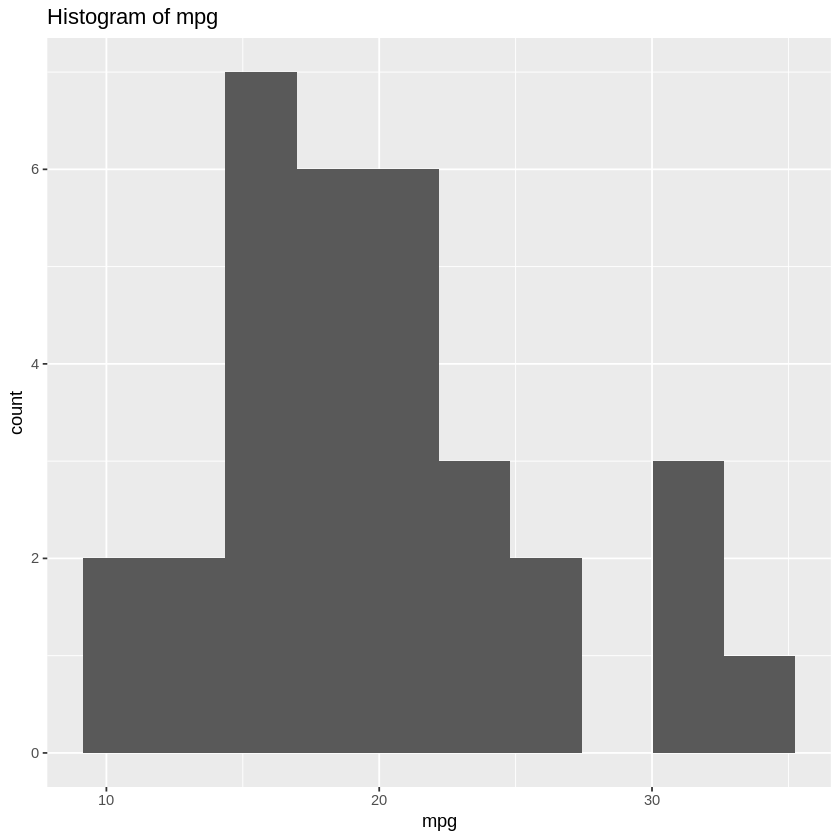

In [ ]:
# create a histogram of mpg with a title
ggplot(data = mtcars, aes(x = mpg)) +
  geom_histogram(bins = 10) +
  labs(title = "Histogram of mpg") #  And within this layer I'm specifying the title of that histogram

---

<br>

### Basic Plots in `ggplot2`

#### Histogram

* A `ggplot` histogram is created using the `geom_histogram` geometry

* The script below creates a histogram of the `mpg` variable from the `mtcars` dataset

🎯 Histogram: geom_histogram()
```
ggplot(data = df, aes(x = mpg)) +
  geom_histogram(bins = 10) +
  labs(title = "Histogram of MPG", x = "MPG", y = "Count")
  ```

⬇️ Layer-by-layer Meaning:

    ggplot(data = df, aes(x = mpg)): We start by mapping a numeric variable (MPG) to the X-axis.

    geom_histogram(bins = 10): Plots frequency bars by binning MPG values.

    labs(...): Adds readable labels — crucial when preparing visuals for an audience.

✅ Use case: When you want to see if your variable is symmetric, skewed, or has outliers.

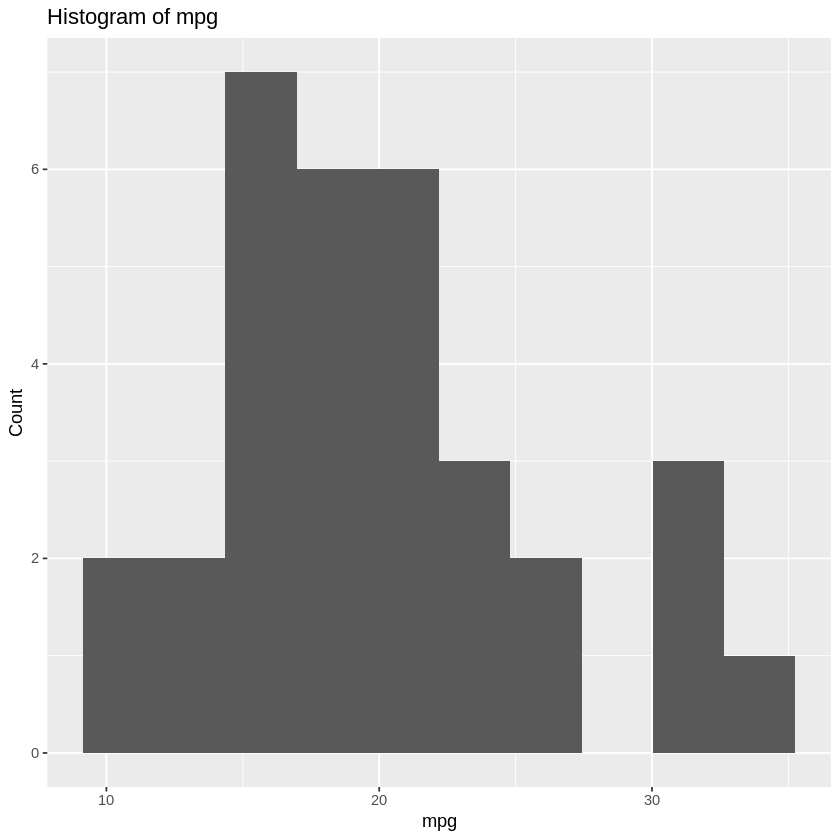

In [ ]:
# create a histogram of mpg
ggplot(data = mtcars, aes(x = mpg)) +
  geom_histogram(bins = 10) +
  labs(title = "Histogram of mpg",
       x     = "mpg",
       y     = "Count")

#### Barplot

* A `ggplot` barplot is created using the `geom_bar()` geometry

* The script below creates a barplot of frequencies of the `cyl` from the `mtcars` dataset
 Layers:

    aes(x = factor(cyl)): Mapping a categorical variable to X-axis.

    geom_bar(): Counts and stacks bars automatically.

    factor() is important to ensure numbers (like 4, 6, 8) are not treated as continuous.

📌 Great for quick overview of category distributions.

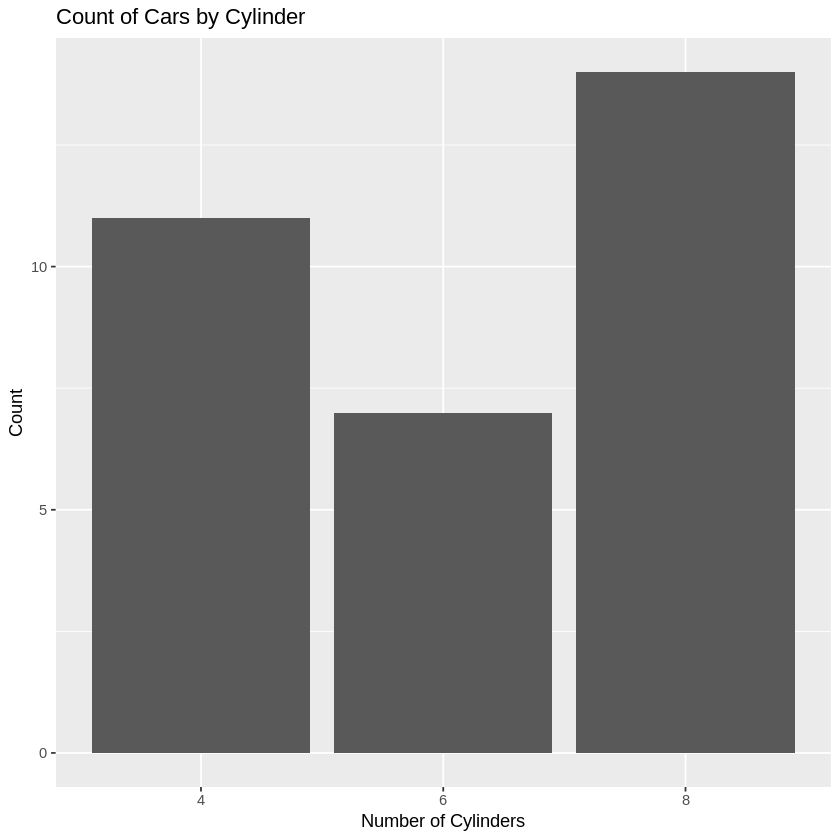

In [ ]:
# convert cylinders to a factor
mtcars$cyl <- as.factor(mtcars$cyl)

# create a frequency barplot of number of cylinders
ggplot(mtcars, aes(x = cyl)) +
  geom_bar() +
  labs(title = "Count of Cars by Cylinder",
       x     = "Number of Cylinders",
       y     = "Count")

#### Scatterplot

* A `ggplot` scatterplot is created using the `geom_point()` geometry

* The script below creates a scatterplot of the `mpg` variable on the y-axis and the `hp` variable on the x-axis

* Note how the aesthetic mapping `aes()` now specifies both an `x` and `y` as they are required for a scatterplot
Layers:

    aes(x = hp, y = mpg): Maps two continuous variables.

    geom_point(): Each row in your dataset = one dot.

    labs(...): Optional, but clean labels make visuals presentation-ready.

🎓 Used to observe trends: increasing, decreasing, nonlinear patterns.

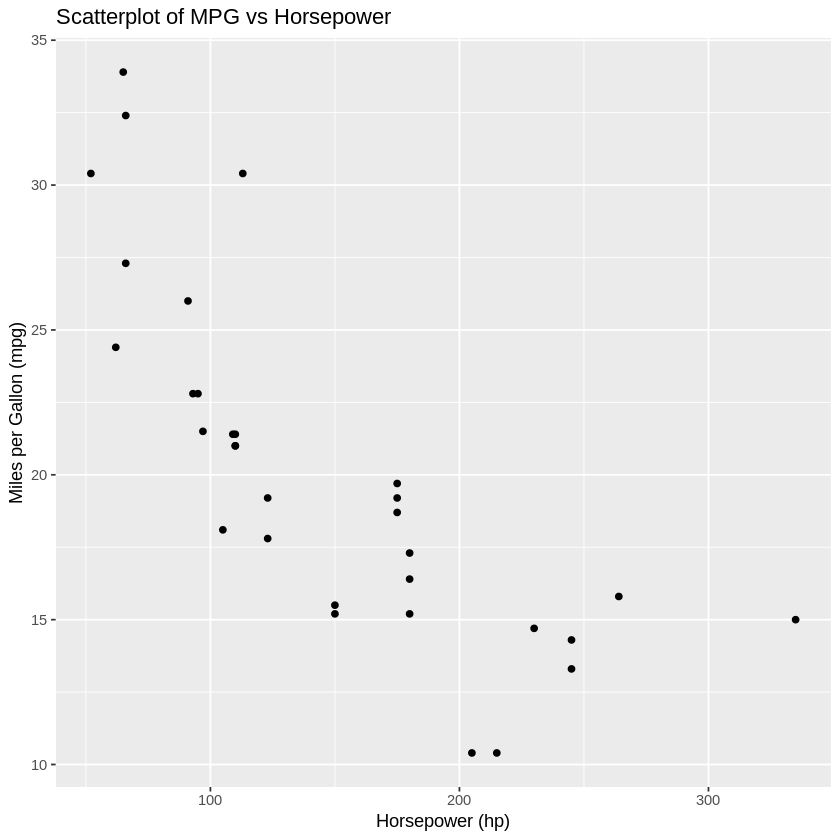

In [ ]:
# create a scatterplot of mpg vs hp
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point() +
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)")

#### Boxplot

* A `ggplot` boxplot is created using the `geom_boxplot()` geometry

* The script below creates a boxplot of the `mpg` variable on the y-axis and the `cyl` variable (`factor`) on the x-axis from the `mtcars` dataset

* Note how the aesthetic mapping `aes()` now specifies both an `x` and `y` as they are required for a boxplot
    Box shows IQR; line shows median.

    Whiskers show data spread; outliers are plotted individually.

✨ Best for comparing distributions across group

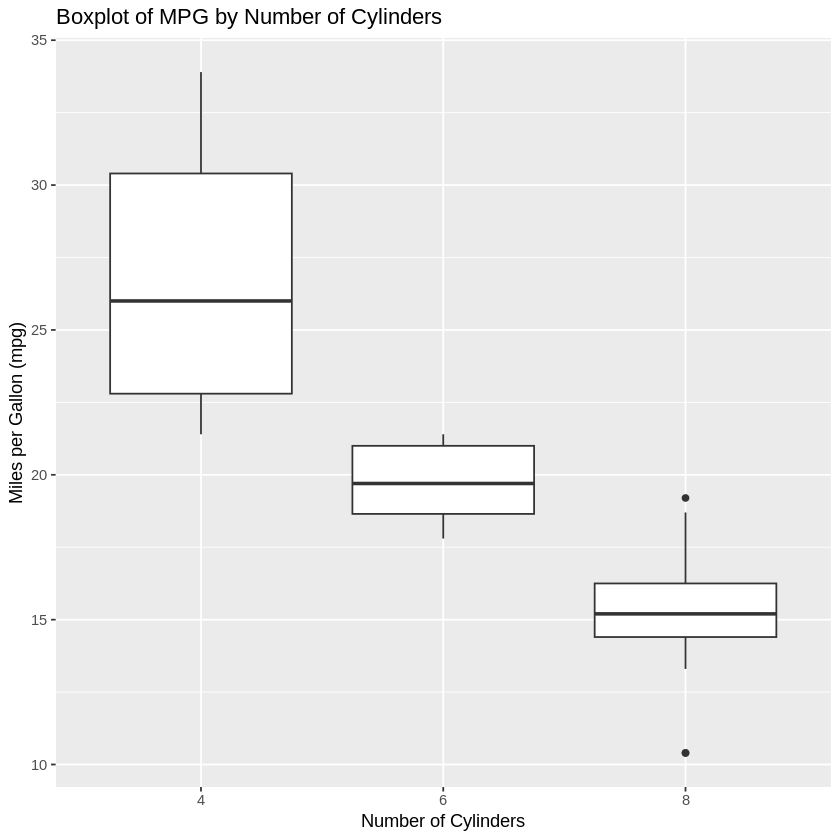

In [ ]:
# create a boxplot of mpg vs number of cylinders
ggplot(mtcars, aes(x = cyl, y = mpg)) +
  geom_boxplot() +
  labs(title = "Boxplot of MPG by Number of Cylinders",
       x     = "Number of Cylinders",
       y     = "Miles per Gallon (mpg)")

#### Heatmap

* A `ggplot` heatmap is created using the `geom_tile()` geometry

* The script below creates a heatmap of frequencies of the `cyl` and `gear` variables from the `mtcars` dataset

* A frequency table must first be calculated and converted to a data frame for `ggplot`

* The counts are included as the `fill` argument in the aesthetic mapping

Layers:

    aes(fill = Count): Color intensity encodes frequency.

    Requires data transformation (table() → as.data.frame()).

    geom_tile(): Plot grid tiles whose brightness varies by Count.

🧠 Heatmaps = best for spotting joint frequencies of two categorical variables.

In [ ]:
# compute frequency table
freq_table <- as.data.frame(table(mtcars$cyl, mtcars$gear))
freq_table

Var1 Var2 Freq
1 4    3     1  
2 6    3     2  
3 8    3    12  
4 4    4     8  
5 6    4     4  
6 8    4     0  
7 4    5     2  
8 6    5     1  
9 8    5     2

In [ ]:
# rename columns
names(freq_table) <- c("Cylinders", "Gear", "Count")
freq_table

Cylinders Gear Count
1 4         3     1   
2 6         3     2   
3 8         3    12   
4 4         4     8   
5 6         4     4   
6 8         4     0   
7 4         5     2   
8 6         5     1   
9 8         5     2

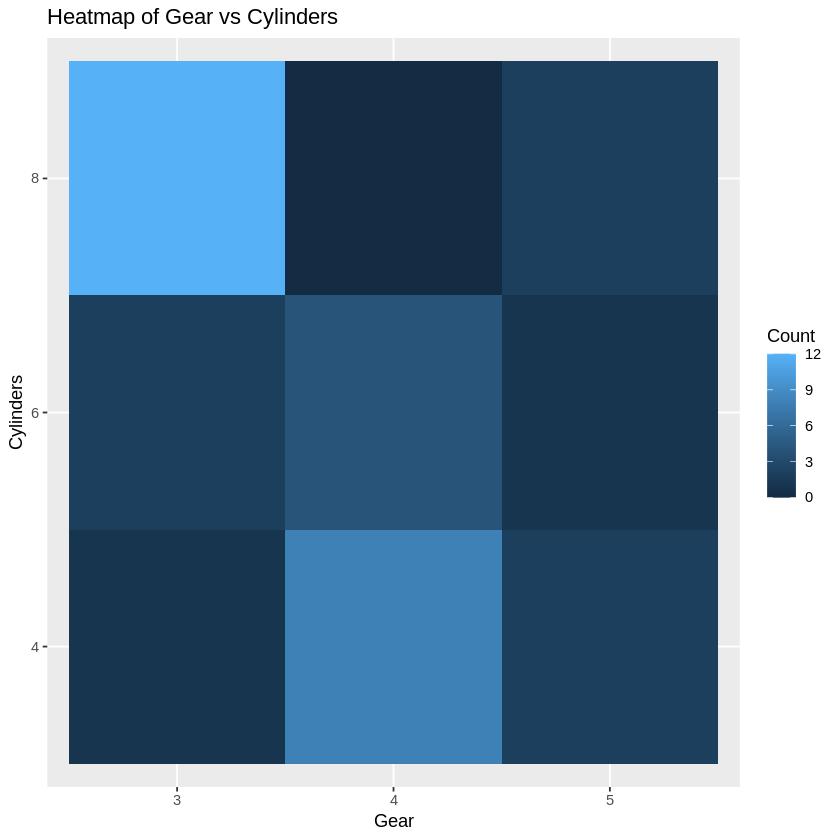

In [ ]:
# create heatmap
ggplot(freq_table, aes(x = Gear, y = Cylinders, fill = Count)) +
  geom_tile() +
  labs(title = "Heatmap of Gear vs Cylinders",
       x     = "Gear",
       y     = "Cylinders",
       fill  = "Count")

---

<br>

### Adding Dimensions for Visualization

* The visualizations we have created only contain information about one or two variables

* We can introduce additional dimensions of visualization to incorporate information on more variables

* Common visualization dimensions include
  * color
  * shape
  * size
  * text

#### Color

* For example, let's revisit the scatterplot we created earlier

* Including a `color` dimension for the `cyl` variable plots the scatterplot with different colors for each value of cylinder

* Color dimensions are great for visualizing both categorical and numeric variables
*  Best for categories — quick recognition by eye.

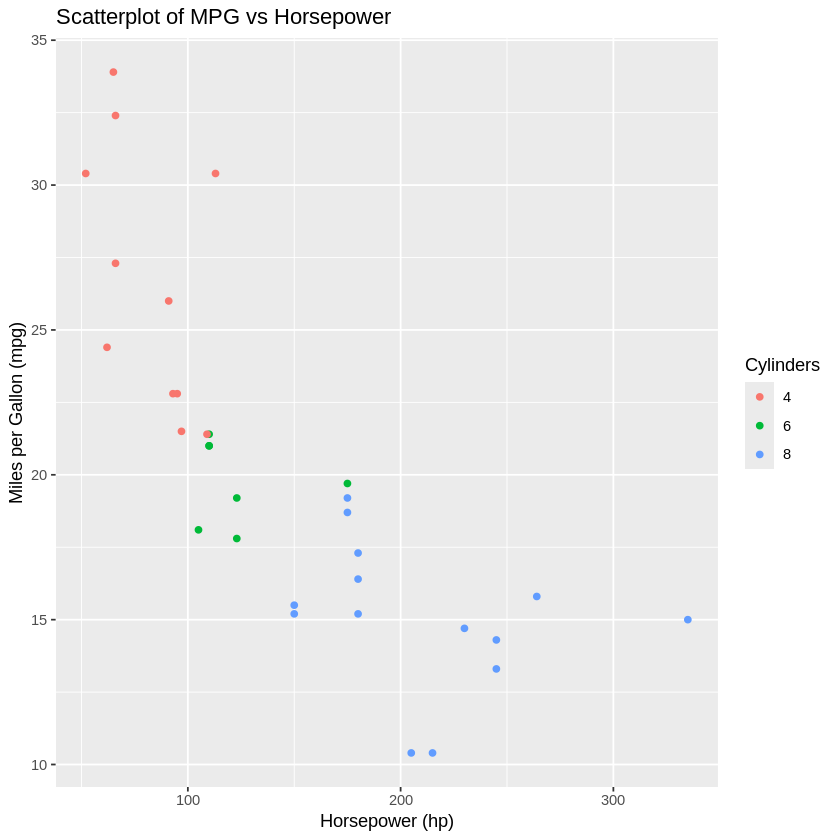

In [ ]:
# including a color dimension
ggplot(mtcars, aes(x = hp, y = mpg, color = cyl)) + # colors points based on cyl
  geom_point() +
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)",
       color = "Cylinders")                         # labels the color dimension

* If including `color` to describe another variable, you must include this argument in the `aes()` mapping

* If you simply want to change the color of all the points, specify the color in the geometry `geom_point()`

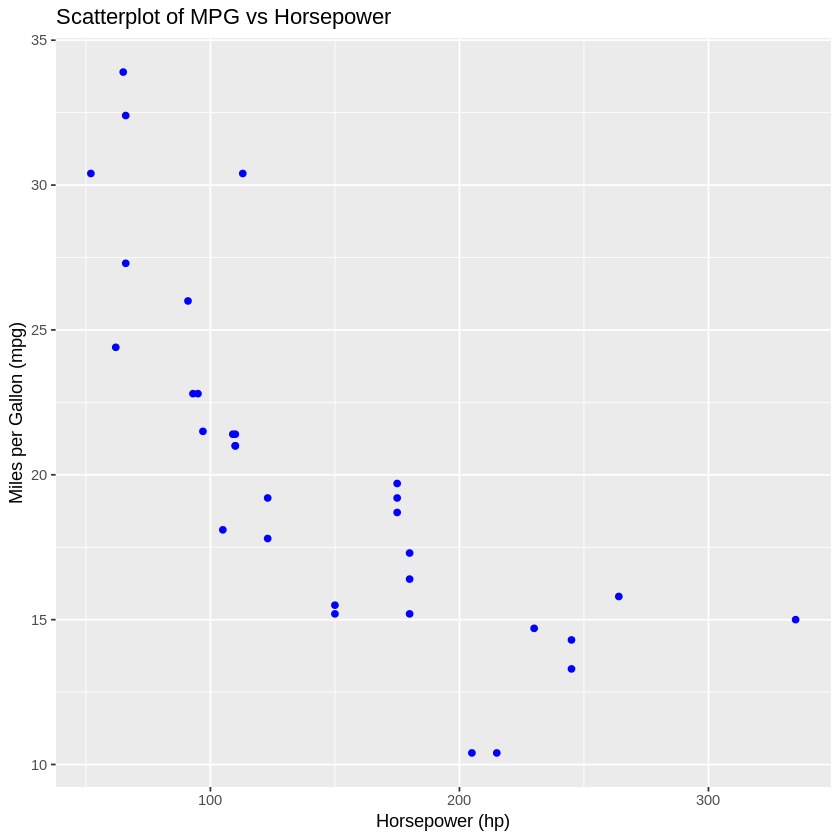

In [ ]:
# including a color dimension
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point(color = "blue") +                         # makes ALL points blue
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)")

#### Shape

* We can also represent another variable using `shape`

* Shape dimensions are best for categorical variables
* Shape differentiates categories without relying on color

    Accessible for colorblind readers

📌 Use with 3–4 levels only — shapes become confusing if overused.

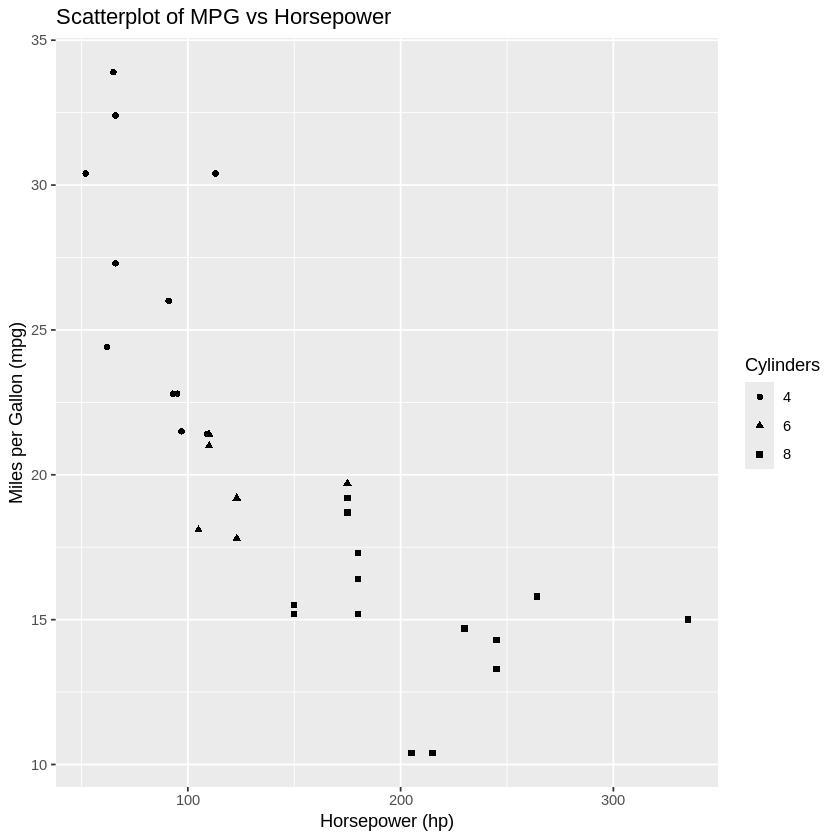

In [ ]:
# including a shape dimension
ggplot(mtcars, aes(x = hp, y = mpg, shape = cyl)) +
  geom_point() +
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)",
       shape = "Cylinders")                   # labels the shape dimension

#### Size

* Size can be included in two different ways

  1. We can represent another variable with size, just like with color or shape as before

    OR

  2. We can increase the size of all the points

      Point radius reflects a quantitative measure (e.g. car weight)

    Best for ordinal or continuous variables

⚠️ Avoid for categorical vars — R may warn you.

* The script below includes the `cyl` variable by the size of the points

* Size is best used for numeric variables or ordinal categorical variables

Warning message:
“Using size for a discrete variable is not advised.”


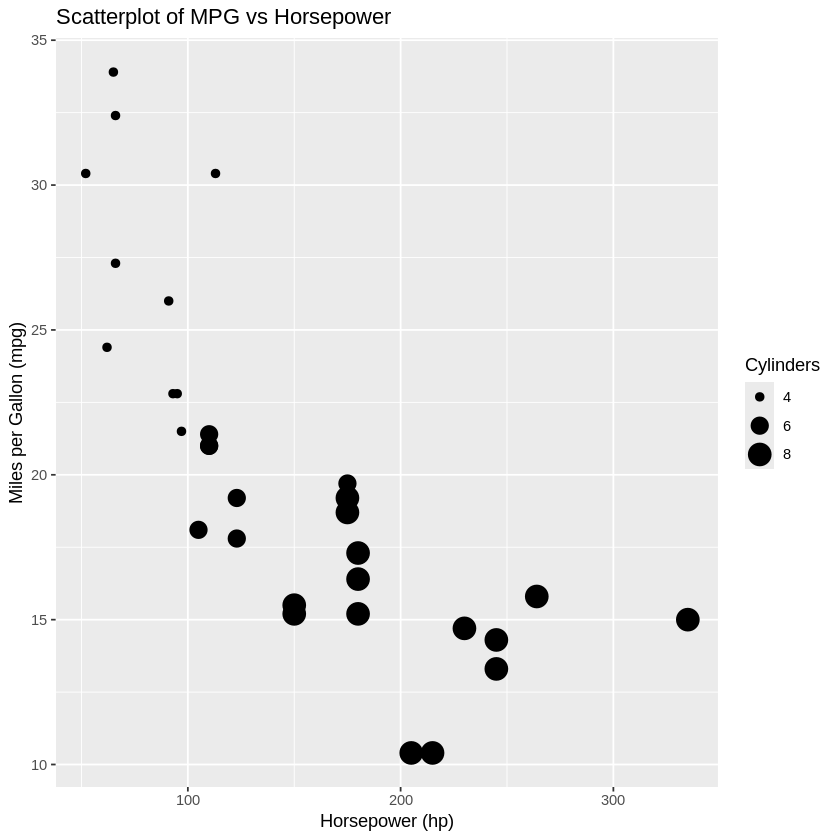

In [ ]:
# including a size dimension
ggplot(mtcars, aes(x = hp, y = mpg, size = cyl)) +
  geom_point() +
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)",
       size  = "Cylinders")                    # labels the size dimension

* To increase the size of all points, we instead use the `geom_point()` geomtry and specify a number

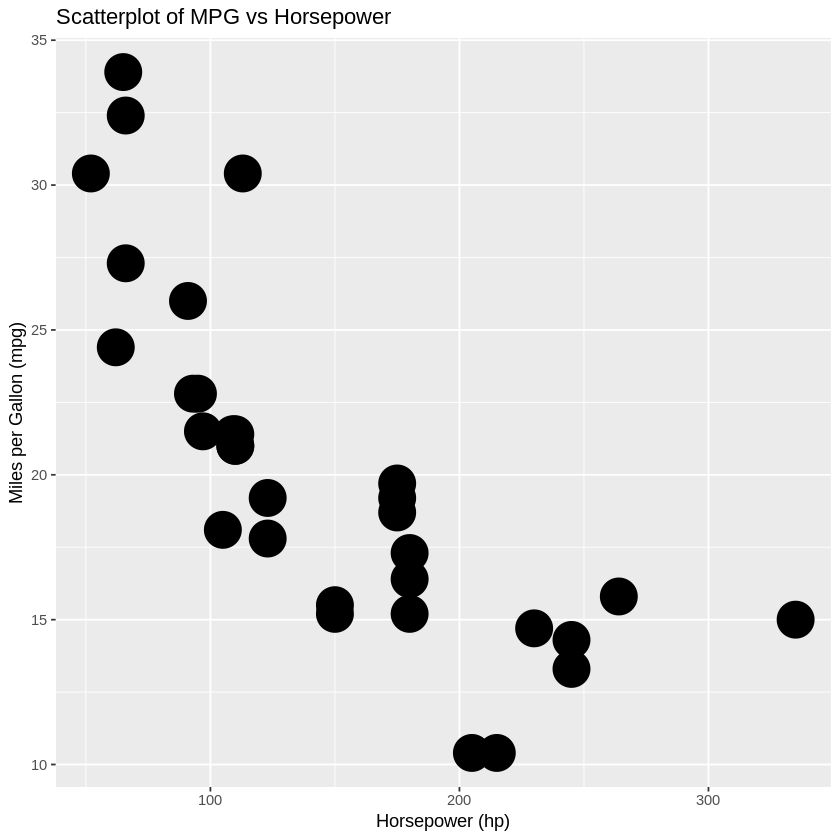

In [ ]:
# change size of all points
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point(size = 10) +
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)")

#### Text

* We can also add text to plots use the `geom_text()` geomtry

  * `vjust` adjusts the text vertically
  * `hjust` adjusts the text horizontally
  * `size` adjusts the size of the text

* Since we are including text, we must include their labels, which is specified as the `label` argument in the `aes()` mapping

In [ ]:
rownames(mtcars)

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

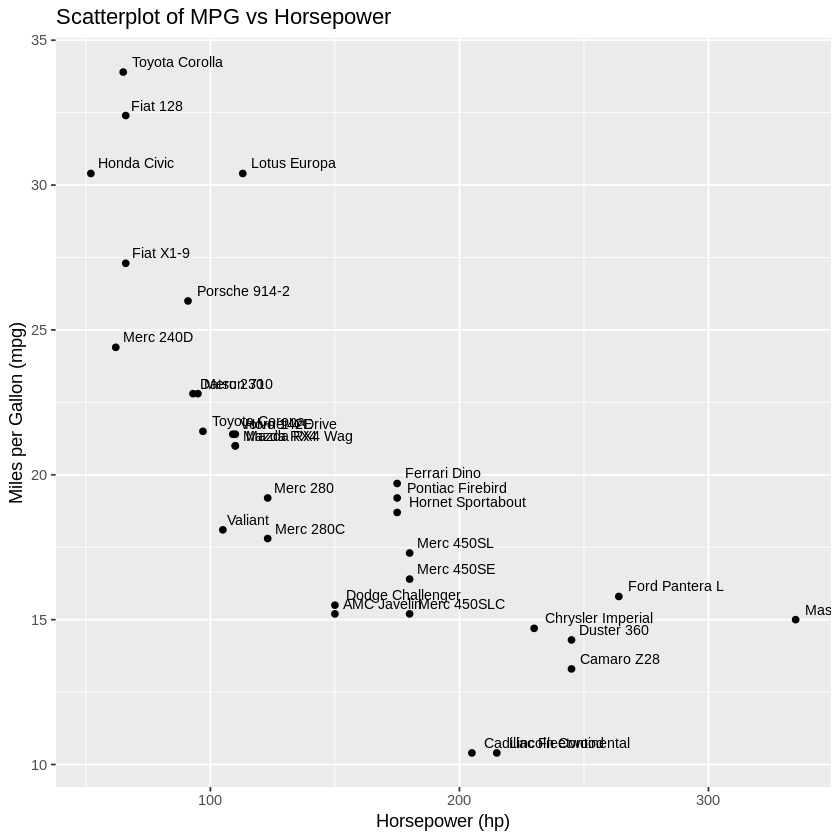

In [ ]:
ggplot(mtcars, aes(x = hp, y = mpg, label = rownames(mtcars))) +
  geom_point() +
  geom_text(hjust = -0.1, vjust = -0.5, size = 3) +
  labs(title = "Scatterplot of MPG vs Horsepower",
       x     = "Horsepower (hp)",
       y     = "Miles per Gallon (mpg)")

---

<br>

### Multiple Dimensions in Data Visualization

* Now we can combine these dimensions to create visualizations rich with information from several variables!

* What can we observe from the plot?

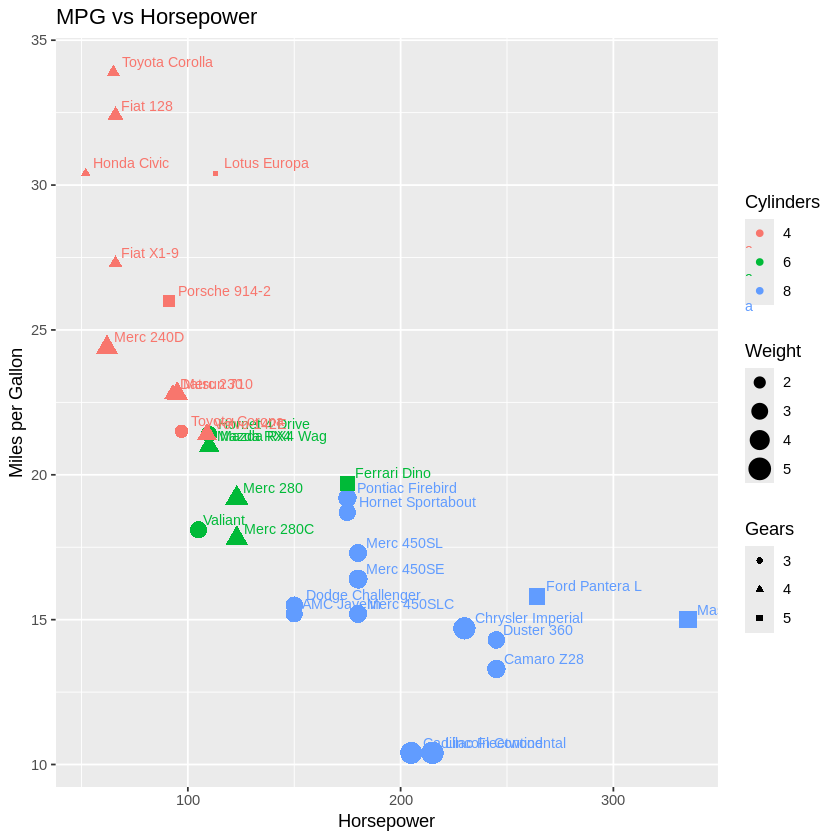

In [ ]:
# ggplot with several visual dimensions
ggplot(mtcars, aes(x = hp, y = mpg,                              # specifies variables for scatterplot
                   color = factor(cyl),                          # visualize cyl as color, also converts to factor
                   shape = factor(gear),                         # visualize gear as shape, also converts to factor
                   size  = wt,                                   # visualize wt as size
                   label = rownames(mtcars))) +                  # include car names as labels

  geom_point() +                                                 # creates the scatterplot

  geom_text(hjust = -0.1, vjust = -0.5, size = 3) +              # include text and adjust spatially

  labs(title = "MPG vs Horsepower",                              # title of plot
       x     = "Horsepower",                                     # x-axis label
       y     = "Miles per Gallon",                               # y-axis label
       color = "Cylinders",                                      # label for color dimension
       shape = "Gears",                                          # label for shape dimension
       size  = "Weight")                                         # label for size dimension

#### Adding a Dimension to a Boxplot

* To add a dimension to a boxplot, we can use the `fill` argument of the `aes()` mapping

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Using size for a discrete variable is not advised.”


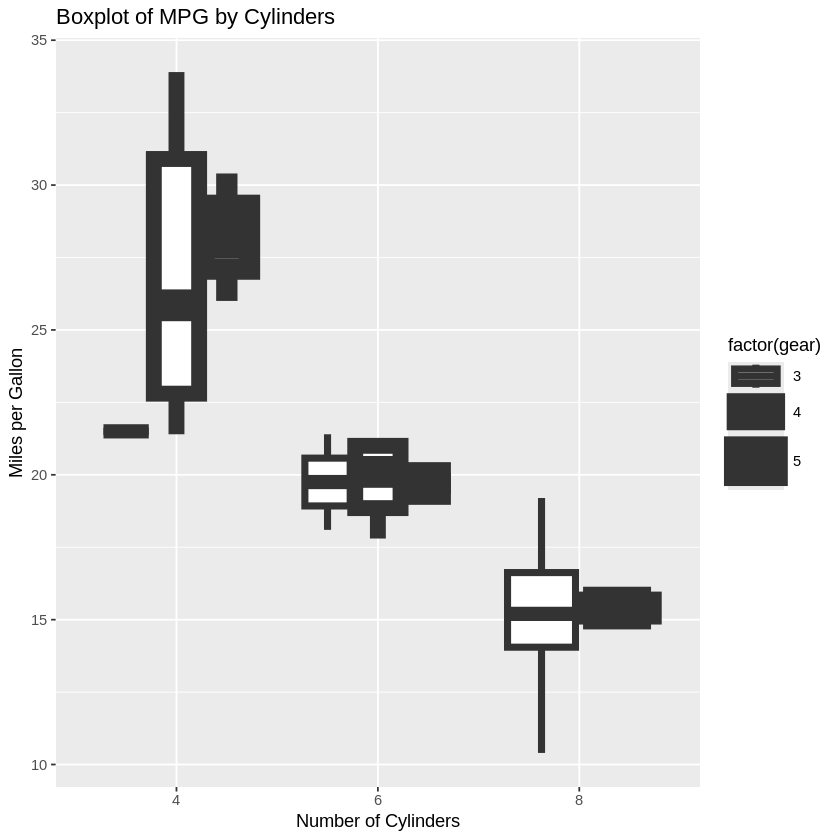

In [ ]:
# create a boxplot with color dimension
ggplot(mtcars, aes(x = factor(cyl),
                   y = mpg,
                   fill = factor(gear))) +
  geom_boxplot() +
  labs(title = "Boxplot of MPG by Cylinders",
       x     = "Number of Cylinders",
       y     = "Miles per Gallon",
       fill  = "Gears")

---

<br>

### Documentation and Sources for Help

* Today, we only covered the basics of the `ggplot2` package

* There are many, many more functions included with the `ggplot2` package; way too many to memorize

* Covering all of these options would require an entire course!
Nested Visualization Layers:

    Color: Cylinder type

    Shape: Number of gears

    Size: Vehicle weight

    Text: Car name

This is the ultimate “storytelling” plot. Useful when you want to present several variables at once — like a data dashboard.
🧃 Grouped Bo

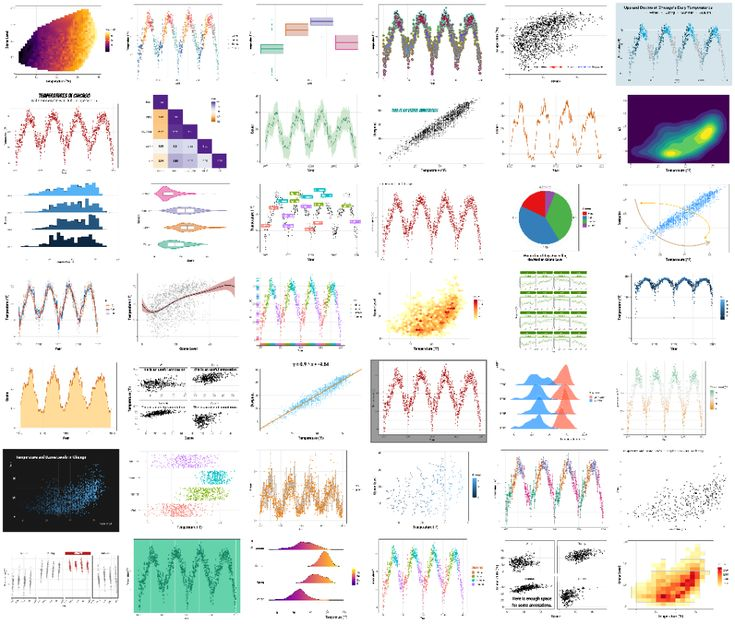

* In practice, use documentation or online assistance to determine how to develop your visualization

* AI chatbots (e.g., ChatGPT) are amazing at providing you with starting point for your visualization or even debugging your code

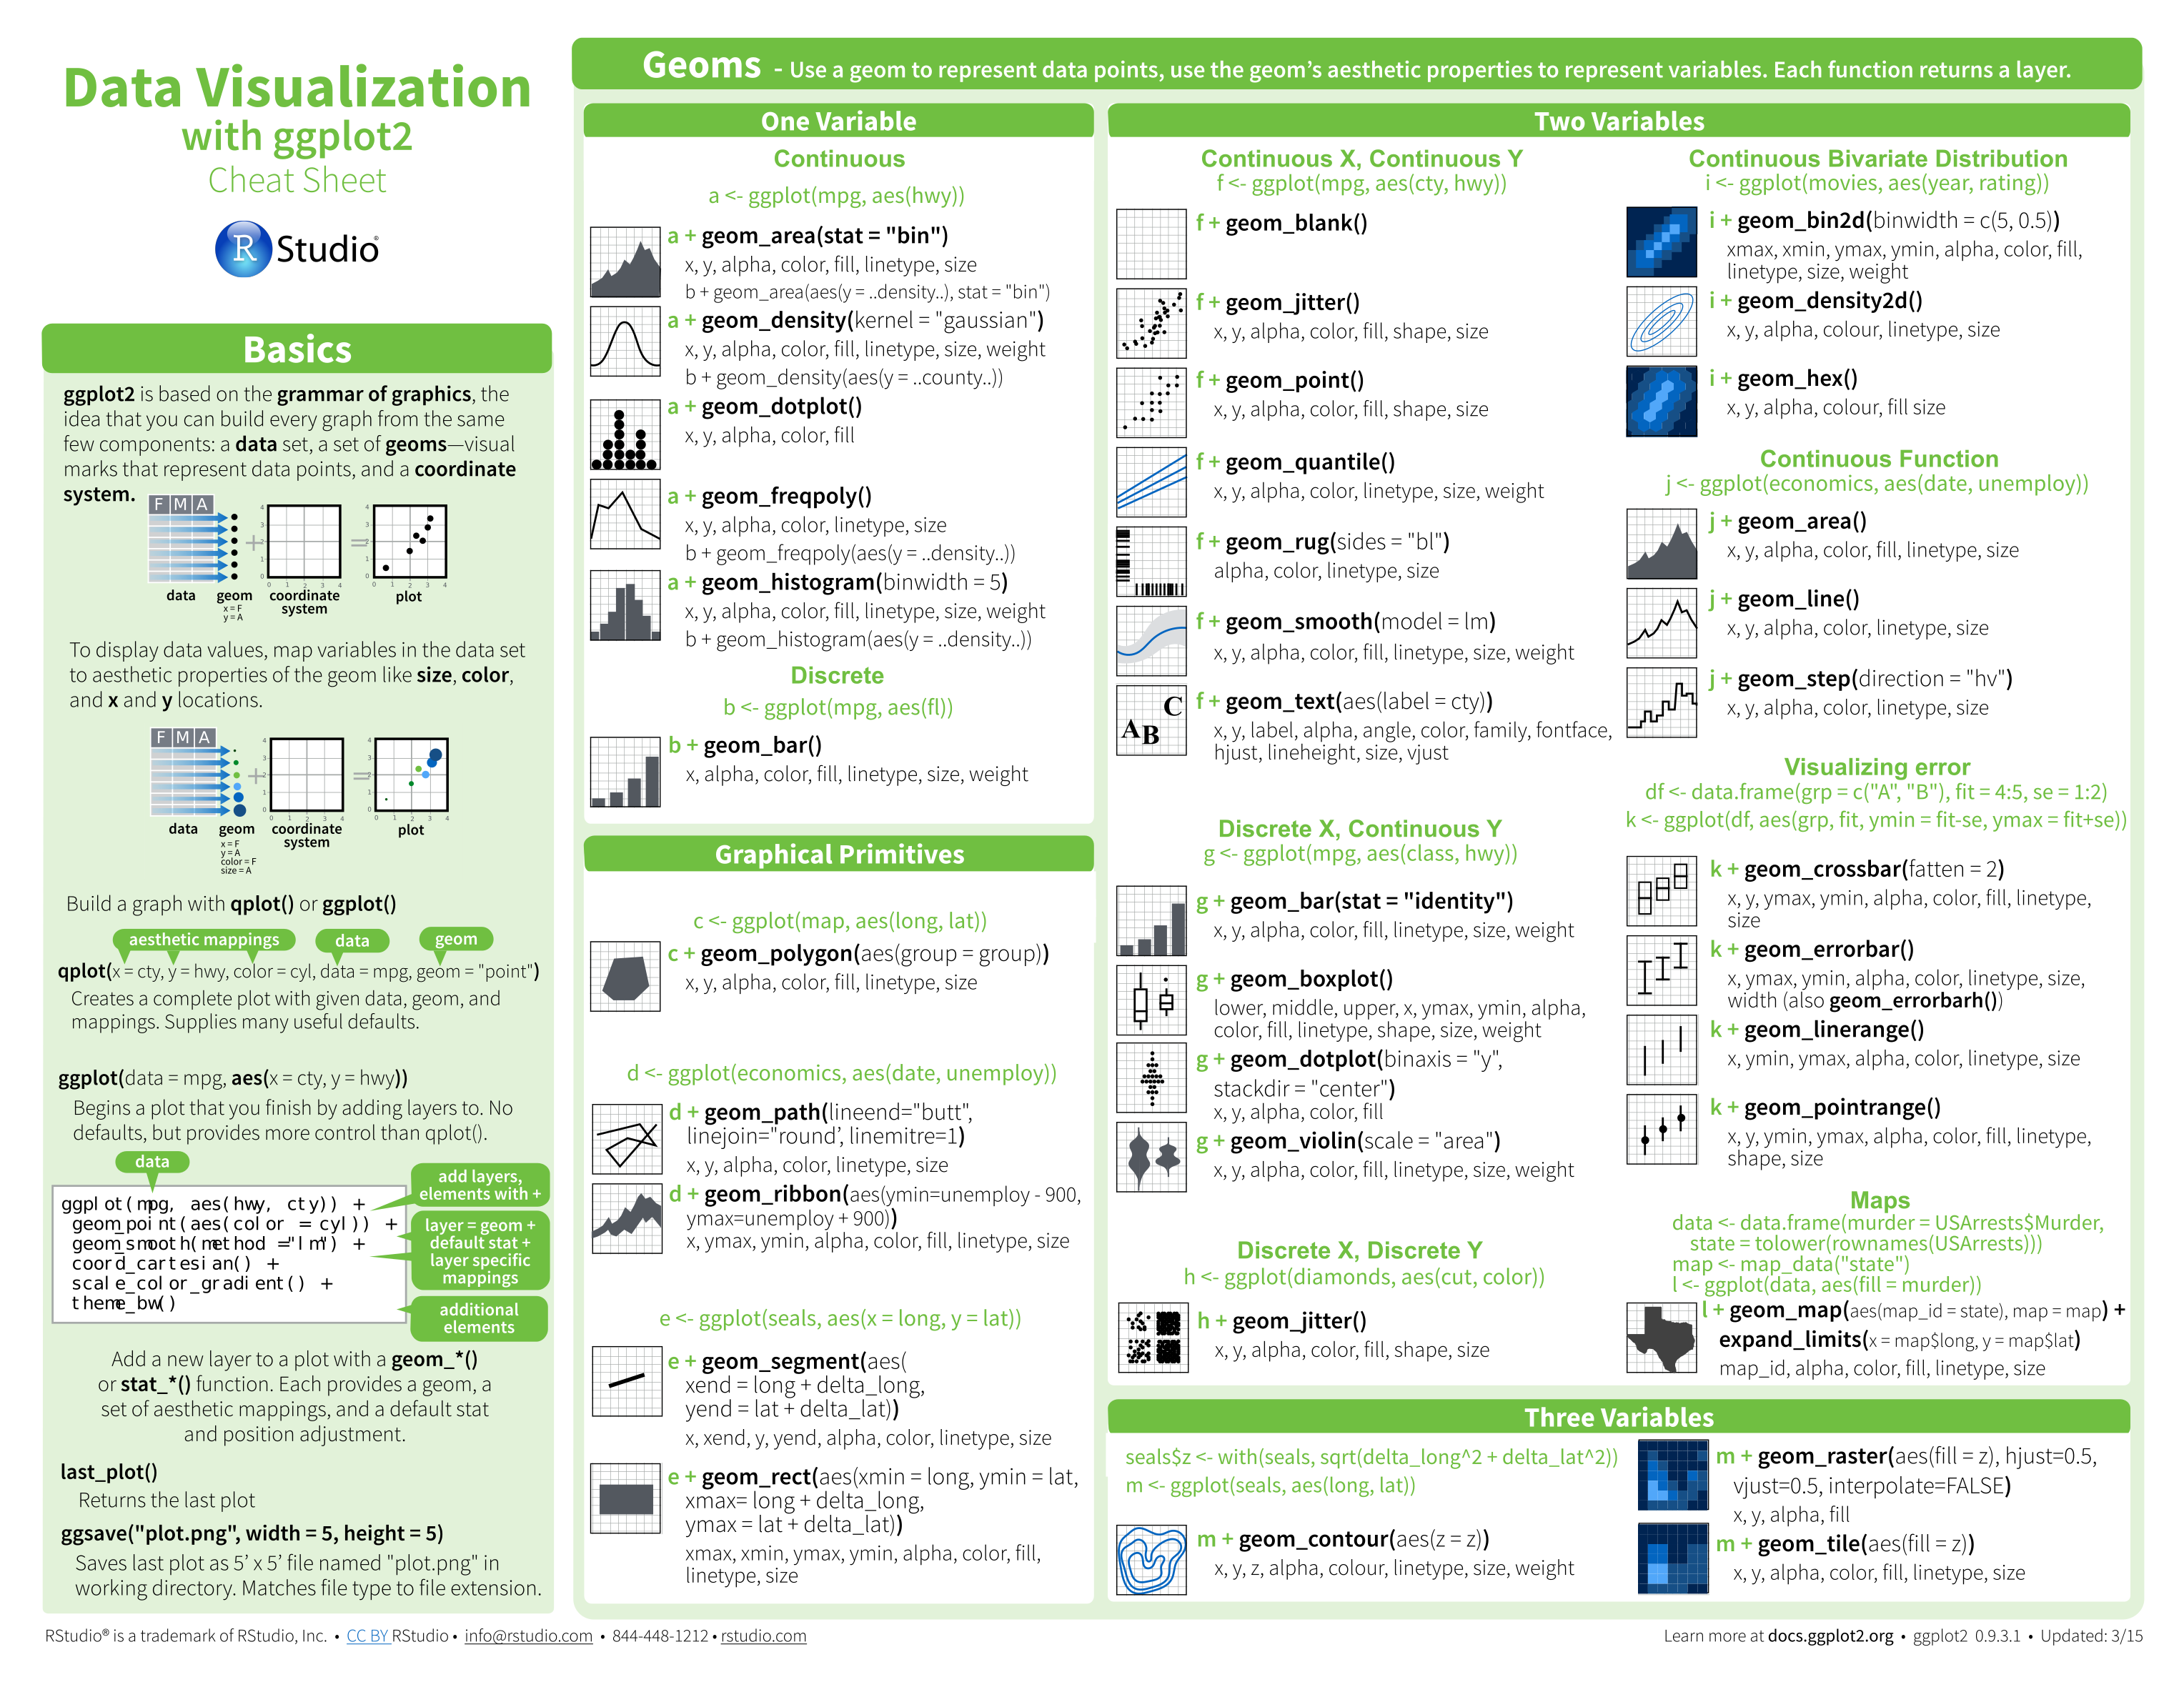

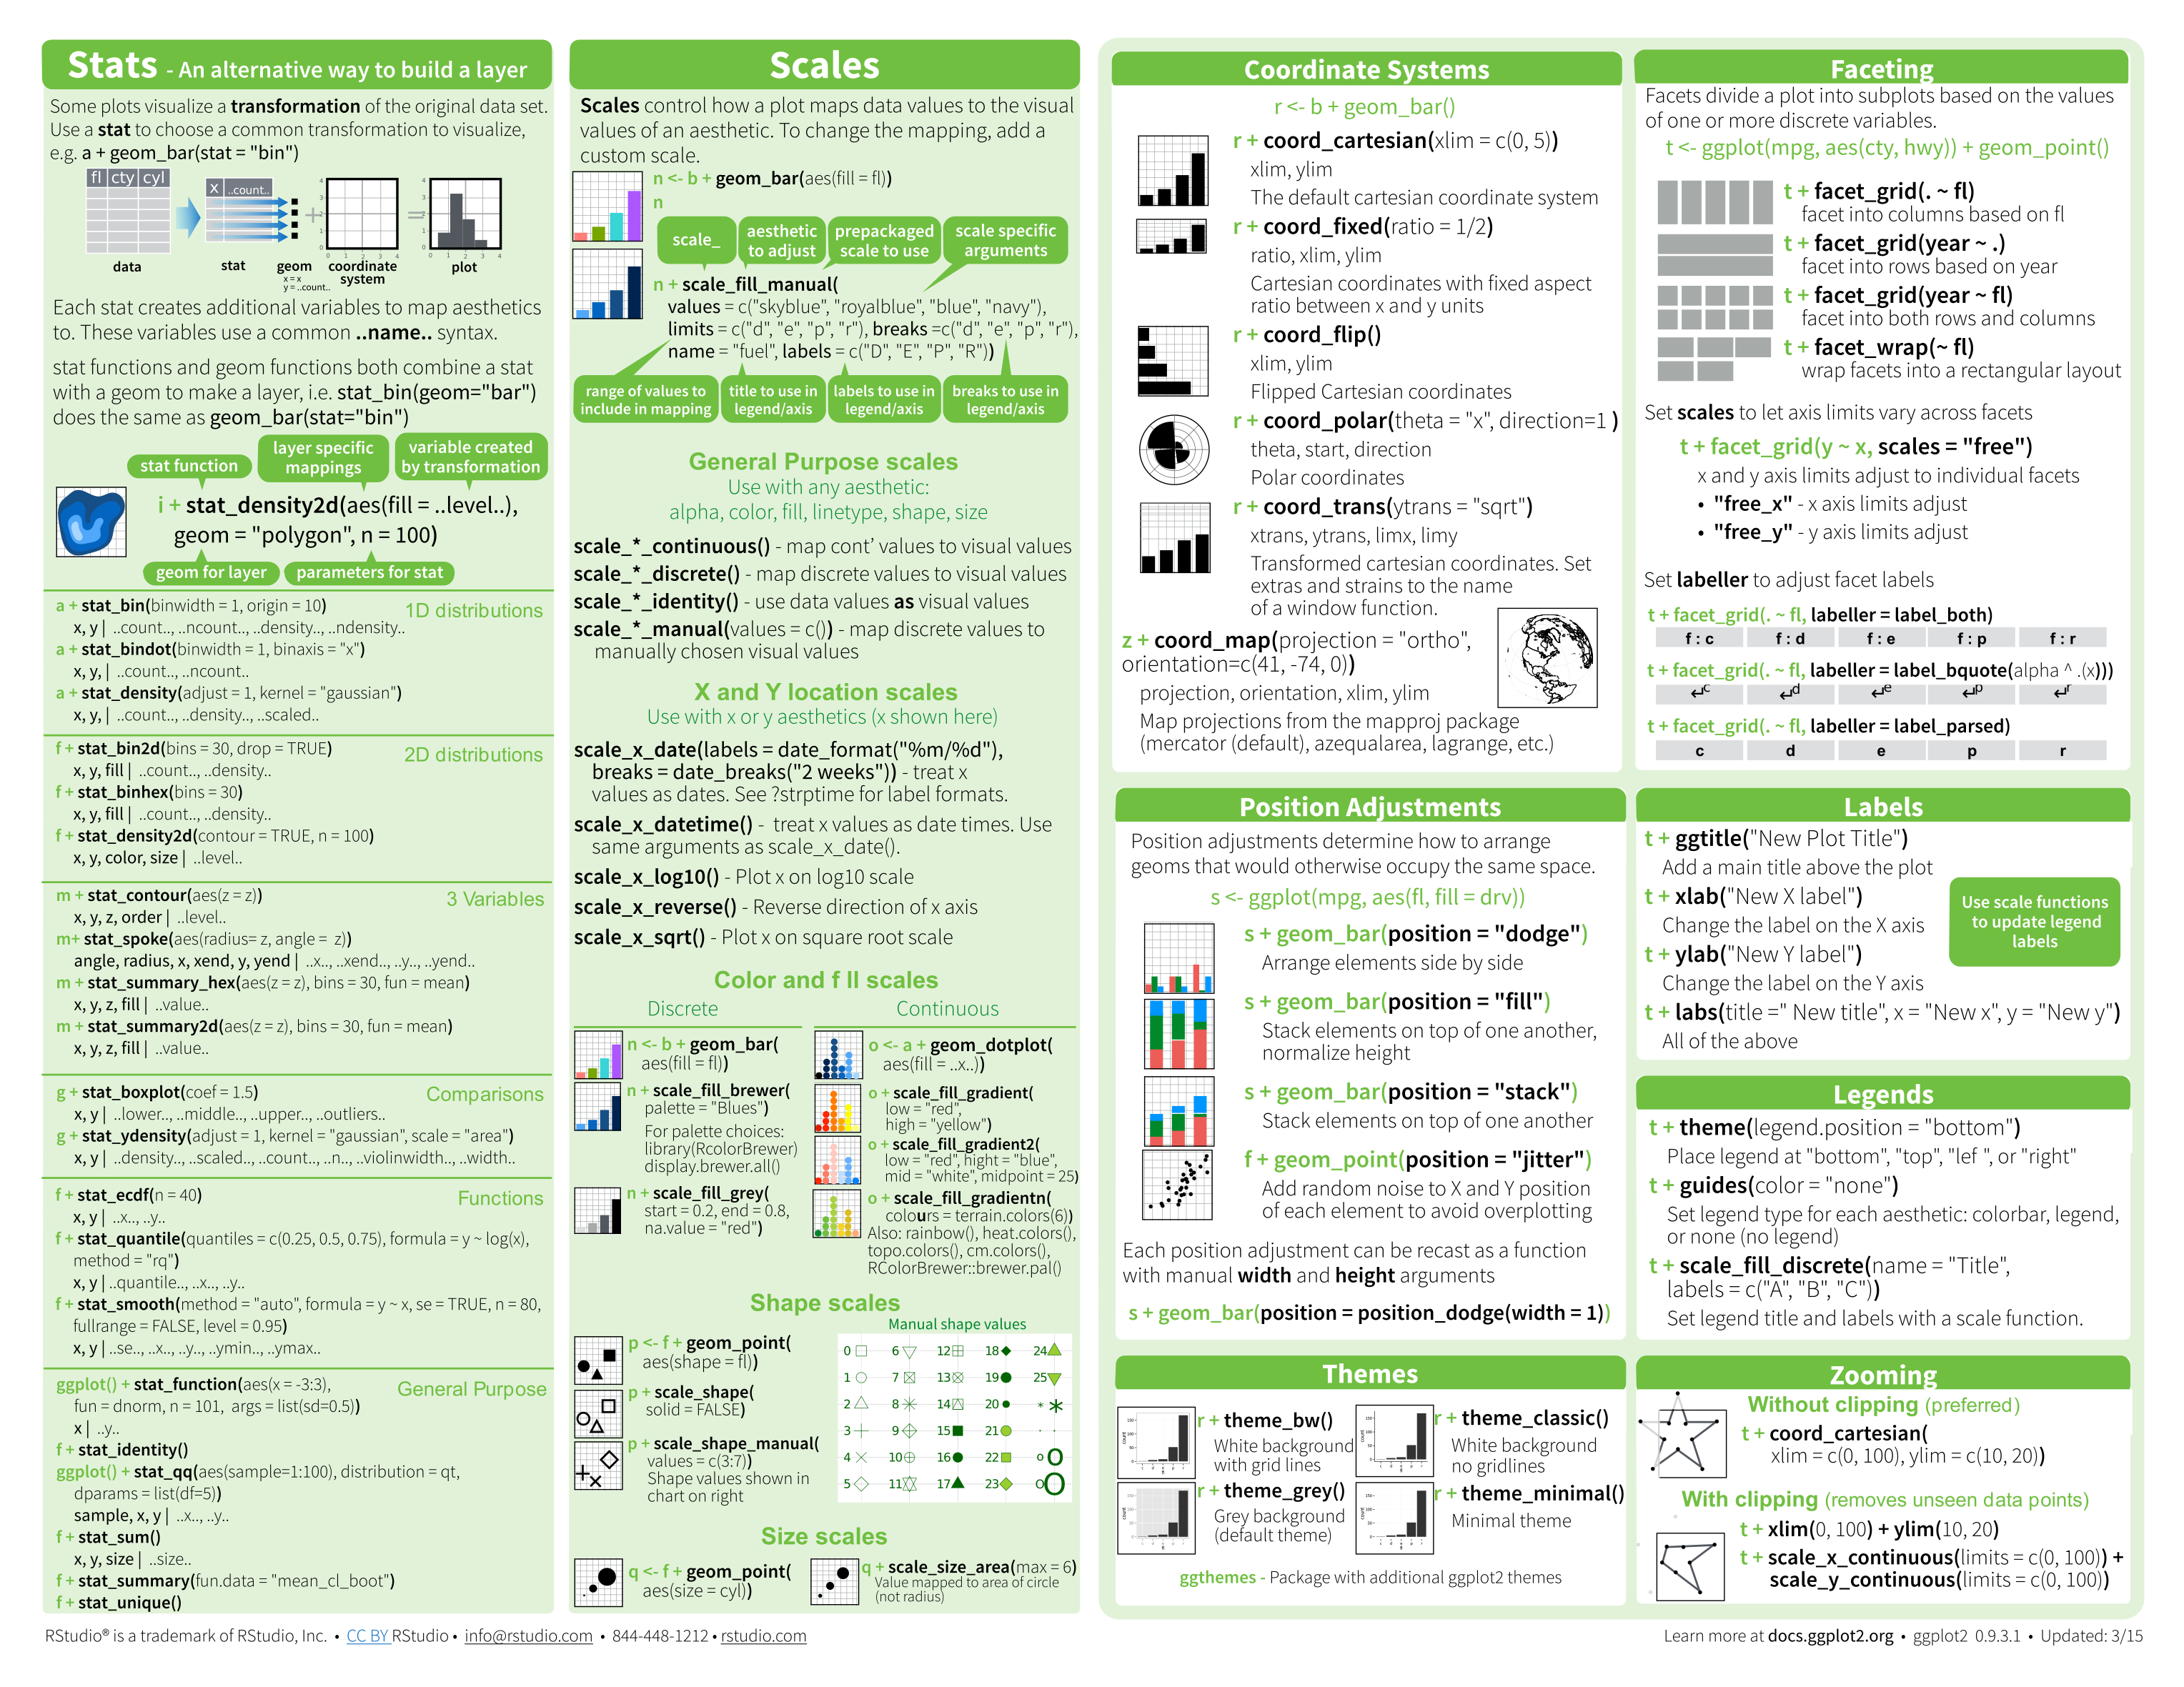

# Course Transcript

Hi class, welcome to today’s lecture. So today, we’re going to cover a bit more data visualization, except we’re going to use a specific package that will enable us to create nicer visuals—a bit more powerful. The package is called **ggplot2**. So we’re going to load that library. Note that it is already installed within Google Collaboratory, so there’s no installation required. We just simply need to load that library.

A bit of introduction:

Earlier in the semester, we actually established the importance of data visualization—right? For understanding the densities or distributions of different variables as well as visualizing relationships between variables within our dataset.

And I motivated the need for visualization using this example here.

In the past, I gave you a vector of numbers, and I wanted you to determine visually—or just viewing these sets of numbers—what is the mode of that dataset. And it’s actually quite difficult, because we’re visually perceptive beings, right?

Also, imagine if I gave you a data frame with a list of variables and numbers, and I asked you: are these two variables related or correlated? It’s very difficult to determine that just from a list of numbers, right? So we need to refer to **data visualization**, which makes it much easier to understand these relationships.

So we have this list of numbers, and we could determine the mode from this dataset if we were to count each unique value within this vector. However, obviously, we can use R to count the frequencies of each unique value, plot them using a bar plot, and immediately we see that the mode here is 6.

So data visualization is very fundamental to data science—honestly, probably more important than the statistics themselves—because we use data visualization to inform us on which statistics to use to begin with, right?

Now, why would we create plots in **base R** as opposed to **ggplot2**, since ggplot2 creates nicer visualizations?

Well, the thing is, we only cover the most basic plots in base R, right—with the exception of heat maps (but there is a heat map function in base R). Basic plots in base R are useful for creating very fast visualizations for personal use. So if you’re going to perform an exploratory analysis and you just want to take a quick peek at the distribution of a variable, it’s very fast. You just say:


hist(mtcars$mpg)


and bam, you're already viewing the histogram of that variable.

**ggplot2** has a bit more syntax than that, so it’s not as quick in terms of these simple visualizations.

So base R is very useful for, say, a rough exploratory analysis where the aesthetic appeal—how nice the plot is—is not of immediate importance. We don’t really care how pretty the plot is. We just want to plot out data so we can understand our data distributions a bit better.

However, when do we create ggplots using this **ggplot2** package?

Well, for one, if we want to create visualizations that are meant for an audience—such as maybe you’re creating a report for your supervisor, or maybe you’re creating a presentation for a large group of people, and you’d like to create plots that are aesthetically pleasing.

Another option would be including plots in your publications, right?

An alternative use for ggplot is if you wanted to convey much more complex relationships. So currently, in base R, we’re only using two variables—at most—for, say, a scatterplot. Well, you can actually incorporate many more dimensions of information from other variables using **ggplot**.

So this is our alternative to base R.

The package **ggplot2** is capable of producing these very aesthetically pleasing and beautiful visualizations that can convey quite complicated relationships within your data across several variables.

Now, I do emphasize that the functions in base R are also capable of visualizing these complicated relationships—you can add shape, you can add color, you can add text—but unfortunately, it would require many, many lines of code.

I’ve actually created a base R plot that was equivalent to a ggplot, and rather than having 4 or 5 lines of code, the base R code was probably up to 30 lines. Right?

So **ggplot2** is much better for these two purposes here.

----
Right? So let's jump right into how to create some ggplots. Okay, I just want to make the distinction really quickly that the package is called ggplot 2. However, when you actually plot something using ggplot 2, the package you use a function called ggplot. So there is no 2 here. All right

Now. Plots using ggplot 2. This package have a slightly different syntax than R, and it takes some getting used to, but you can acclimate over time. So there is an example script here below which I'll use to

explain how to create these ggplots. So this script has several different components which make up a ggplot.

First, st you'll notice this function ggplot right now, this function actually initializes a blank plot. So if I were to just say ggplot and run that it just creates a blank plot. Right? And essentially, we need to add attributes and layers to that plot.

Now, within the ggplot. 2 function, we always need to specify our data frame that contain the very data frame that does contain the variables that we'd like to plot

right? And we do this using the data argument.

So this is a data frame containing your data set.

Now in contrast to base R which allows you to plot individual variables, right? So we can actually, as I said before.

plot a histogram of empty cars.

We just pull Mpg

from the empty cars data frame, and we can create a histogram very quickly using that syntax.

whereas in a ggplot we need to specify the data frame.

then we need to specify our variable that we are plotting. Okay? And this brings me to the Aes function that we use within our ggplot function. All right.

Aes stands for aesthetic, all right. And this is an aesthetic mapping.

Now, this aesthetic mapping here includes all of the variables. We're plotting like Mpg, right? It's on our X-axis because it is a histogram.

So the aesthetic mapping includes all the variables we're plotting, and you'll see that we can include several other options within the aesthetic

to alter, say, the color or include additional information from other variables.

All right.

Finally, we have this last component, which is Geome histogram. The geom here stands for geometry.

now a geometry component within a ggplot

specifies the type of plot that we actually want to visualize. So in this case it's geom histogram. So this is a histogram geometry.

Now, these geometry functions also have arguments such as the bins argument. Here.

right within the geom histogram function, the bins argument just specifies some attribute of that geometry so specifically bins specifies the binning of the histogram to plot this actual histogram plot. So I'll run that here.

So you could see this plot here.

Note, there are many, many geometries, including scatter plots, box plots. In fact, I've listed many of the geometries within this figure here. So here we have area and density. These all visualize distributions. These are all on the right visualizing the relationship between 2 variables. So you might have geom point, which is used for scatter plots and so on, and we'll go into the most important ones.

Finally, the last thing I wanted to point out is how aesthetically pleasing this plot is. It's a very soft gray background with grid lines, and you'll see that the other plots we create are even nicer than we saw with base R. Plotting.

Now, one more point about ggplots. We can add layers to the plot. And this is the syntax of how ggplot works. So you'll notice that when we plot a ggplot. We actually have addition symbols. And these addition symbols are outside of the function, right? Which is quite odd in terms of syntax for programming.

Now, I just want to emphasize. This is not an actual addition operation. We're not doing arithmetic addition here. This addition symbol is syntax, saying, we are going to add another layer to the plot. Okay, so as an example here, if I were to erase these layers.

this says, Plot a blank plot

with Mpg. On the X-axis. So you see Mpg. On the X-axis here, right then.

I'm going to add the histogram geometry with 10 bins

which creates this histogram here. But then a new layer that I could add is labels. So I'm going to add

a labels layer. And within this layer I'm specifying the title of that histogram as this string or character data type here.

so you can see that the title appears up here.

and that's essentially the gist of a gg pop.

All right. So now let's cover some basic plotting. We're just going to cover the equivalent plots that we performed in base R.

It's a little more syntax for these simple plots, but you'll see that it becomes much more powerful later on, when we start adding additional dimensions of visualization.

So first off the histogram which we just covered. Right, a ggplot histogram is created using this geometry geom_histogram, and we could specify the number of bins as an argument to that geometry. Right? So this script below creates that histogram, except I've added a little more detail to this layer here. This labs layer.

So we label the title of our plot, Histogram of Mpg.

We can label our X-axis as Mpg.

And our Y-axis as count, since this is a frequency of counts.

So you can see our same histogram plot here, except now we have a Y Axis label and an X-axis label as well as a title.

Now moving forward. We can also create bar plots

and a bar plot in ggplot uses the bar geometry. So we have geom_bar here. Notice. We have the parentheses because it is a function.

And this script here creates a bar plot of frequencies from the cyl variable, which is the number of cylinders within the mtcars dataset

now because we are counting unique categories, although cyl is represented by numbers. I've already converted it to a factor here, but because it's represented by numbers, we need to first convert cyl to a factor

right? And then plot it using the bar geometry. So I'm gonna run this.

So what this does is says, I want to plot a bar plot of the cyl variable

from the mtcars data frame

with these labels here. Right? So notice how we've changed the title here.

All right. Simple enough.

Next up is a scatterplot.

Now a ggplot scatterplot is created using the point geometry. So geom_point.

Okay, now, this is a script below that creates a scatter plot where we plot

horsepower on the X-axis and Mpg on the Y-axis.

I'm going to run this right?

So I also want to note how the aesthetic mapping aes now specifies both X and Y as opposed to up here, which are univariable plots with a single variable. So we just only specify X in these cases.

But because the point geometry requires two points, since this is a 2D plot

plotting a variable Y versus X. We specify these two variables there, so simple enough. That's just a scatter plot.

A box plot. Well, that's created using the boxplot geometry, all right. So this script below basically plots Mpg, which is our quantitative variable, versus cyl, which is our categorical variable, our ordinal categorical variable. And you can see we use the geometry boxplot here with some corresponding labels.

Right?

Also note, because this requires two variables. In the specification of the plot we have our two variables specified here within our aesthetic mapping.

So we are familiar with this plot. We already could see, this is kind of a nice visual with this gray background, and it shows that as your number of cylinders increases

your Mpg tends to decrease right, because it's a more powerful engine.

Now, finally, we're going to cover a heat map. Well, the heat map

is created using something called the tile geometry, and it's because heat maps are essentially tiles with different brightness. Right? It's like a grid of tiles.

So this script below creates a heat map of the frequencies of cylinder and gear. So we'd like to visualize the relationship between these two categorical variables.

So in order to do this, just like before, we need to create a frequency table. So what I'm going to do here is run table of cyl and gear.

Right? And this counts each unique pair of categories. So if I show you here, this is table where we have 4, 6, and 8 cylinders in 3, 4, and 5 gears.

And the way you would read this is, there are 12 cars with 8 cylinders and 3 gears.

The thing is, remember, I said before ggplot takes the data that you'd like to plot as a data frame. Now, this is a table. So we need to convert this frequency table to a data frame.

And we can easily do that using the as.data.frame function. Right? So I'm going to run this.

Okay.

Now, running that you see that we have variable one, which is 4, 6, and 8. That is our number of cylinders.

We have variable two, which is our gear, 3, 4, 5, and then our frequencies here.

So we already know how to do this. So I'm going to rename

the names of that data set here. I use colnames. We didn't really use that in the past. So I'll change that to names. So remember, the names of our frequency table

are not accurate yet. So I'm going to overwrite these original variable names within this data frame

as cylinders, gear and count.

Okay, to do that, we have cylinders, gear and count. And now, finally, we can create our ggplot

using the tile geometry.

So what I'm gonna do is I want to create

a heat map using this tile geometry

of gear and cylinders, and I want their brightness to be filled by their counts. So the brightness of the color

in this heat map is determined by this fill argument, right? And the brightness is the magnitude of that count

from this data frame frequency table.

Okay.

I'm going to run that. And as you can see we have cylinders and gear, so these are each the unique categories and the brightness of the corresponding pair of categories refers to the count. The frequency count. So you can see here there are many 8 cylinder engine vehicles with 3 forward gears.

All right. So all of the plots we created in the last videos for ggplot, we're quite simple, right? They only contain information on, say, one or two variables, and we already know how to do that using base R, so there's nothing really special there except for the fact that they look a bit nicer. Right? What's nice about ggplot is, we can easily introduce additional dimensions of visualization

which incorporate information on several more variables within that data set, and the most common visualization dimensions that we can include in these plots is color, which is the obvious one.

There's also shapes so converting points to say, triangles and squares, and so on, or even other shapes. I've seen plots incorporate pictures as an actual data point.

There's size, right the size of the plot or the points as well as text. Okay.

Now, first, let's look at color.

So let's look at that scatter plot we created earlier where we plotted Mpg on the Y-axis and HP on the X-axis. Right?

So I'm going to show it to you here.

I'm just going to erase this color dimension.

So this is our original plot. Right? Simple enough. It just shows all right as horsepower increases, our Mpg decreases because those are more powerful engines.

Right? But scrolling down here, I'm going to add another argument

to the aesthetic mapping function. Right? I'm going to say, color equals cyl

Now, including this color dimension. This argument

for the number of cylinders within this aesthetic mapping, plots the scatter plot here, but with different colors for each cylinder.

Now this is great for visualizing both categorical and numerical variables. Categorical, right? There's no spectrum of coloration. It's just red, green, and blue here. So it looks

like the holidays, right, but with continuous variables you can have, say this sort of heat map coloration as well.

Right? So this is adding the color dimension to the plot.

And, as you can see, if we look at, say, 4 cylinder engines, they tend to have higher Mpg. And so on.

Now, if including color to describe another variable. You must include this argument in the Aes mapping, right? So we're including it here in the aesthetic mapping—whoops—the aesthetic mapping, not the point geometry.

And I want to emphasize that if you include a color within the point geometry such as color equals blue, right? What it's going to do is just make all the points blue.

Alright. So if you want to incorporate information about another variable

within this aesthetic mapping, be sure to include it right here, and not within the geometry, right? Because this just changes the colors of all the points.

 All right. Now, another dimension we can include in our ggplot visualizations is shape all right and just like before with color. Where we include this attribute or this argument color within our aesthetic mapping, we think we can include shape this argument within our aesthetic mapping. All right.

 Now, I emphasize that shape dimensions are best for categorical variables. Okay, it doesn't really make sense to have continuous shapes using quantitative variables.

 I'm going to run this.

 And what I'm doing here is plotting essentially the same information, except the number of cylinders. Information from that variable is included as different shapes as opposed to color.

 as you can see later on we'll look at size. I should size up these points because it's quite difficult to determine which one's a triangle which one's a square right, which we'll do a little bit later. Also the color just pops out a little more, so that might be more appropriate, but you can see it still contains the same information. Where, if you look at squares or 8 cylinder, if I zoom in here.

squares are 8 cylinder, and you can see that all the 8 cylinder engines tend to have higher horsepower and lower miles per gallon.

All right now. The next dimension for visualization is the size of points. Now, size can be included in a couple different ways. We can represent a variable with size, just like color or shape, as before.

Or we can increase the size of all points just like we made all the points blue. Now, I'm looking at option one, because that's more useful at incorporating additional information from other variables. Right? So we look at this script below.

We're going to plot the same plot, except now, we're going to introduce size as this cyl variable.

You will get this warning here that says, using size for discrete variables is not, as by advised. So this is essentially saying, don't use size for categorical variables, and I think the exception here is, if it's, say an ordinal categorical, variable. But I will say that for the most part you want to use size for quantitative variables. Alright.

So size is best used for numeric variables, like quantitative variables or ordinal categorical variables. So anything with some sort of order ordering. Okay?

So here I'm using the same plot, it's the same information, except now we're including the cylinder, variable information as the size of the points. And again, you see that the small points are 4 cylinder engines, which are low horsepower and high Mpg.

The 8 cylinder engines are represented by larger points on the scatter plot with higher horsepower and lower Mpg. So same information of the 3. Again, I prefer the color dimension, because things pop out more and it's just much more easy to interpret.

Now, alternatively. If you just wanted to increase the size of all points which is relevant right? Because the points in these other plots are quite small.

Right? You can specify size within the point geometry as opposed to the aesthetic mapping here. So see here, I've removed size from the aesthetic mapping.

And I'm just specifying size and some number which determines the size of the points. Now, a larger number

would make the points much larger. Right? So these are huge points. These are small points.

Right? So I'll do 10 here.

And what we can do here is, I could say, shape equals cyl.

And now it's a bit more obvious. I can shrink that down a little bit, right? So the shapes of the points are now much more obvious, because I've increased the size of all the points using this point geometry. I'm just going to revert it back to the original.

And save that there, for your reference.

Alright, what's great is, we can also add text to plots. And we do this using the text geometry. And this makes for very nice visualizations where you can see the text corresponding to a certain point. Or maybe you just want the text to be the points themselves.

Okay, so I'm going to run this here, and what we have

are a few different attributes to this syntax or this script here. All right. So what I'm doing here is, I'm saying, I want to plot a point geometry. So a scatter plot

of horsepower on the X-axis

of Mpg. On the Y axis from the empty cars data frame. However, I'm using this addition symbol right to add an additional geometry called text.

And we're going to label the text from each point using this label argument

right? And what we specify in the label label argument are the row names of empty cars. Well, let me show you that.

Remember the empty car's data frame looks like this.

And this set of row names. These are not variable names. They're just row names right? And if I were to show you the row names of this data frame here.

It's just the vector of the different car names. Okay? So what I'm doing is plotting a scatter plot

with these points.

And then I'm going to label using this text geometry, using these labels, which are the row names or the different car models from that data frame.

Now, there are a few more things that I'm specifying here. So you'll notice that the text geometry has a few arguments specified. Now these adjust the location and the size of the text.

So V, just adjust the test vertically, right? So you could see the text here if I were to say minus 2,

right. This shifts all of them up. Let me do it a little more minus 10.

So it shifts all the points up.

Hjs shifts the text horizontally. So from left to right in size just changes the size of the text. So I could just do 5. Here you can see the text is much larger.

Now, if you wanted to just plot the text alone, I could just comment out, geom point the point geometry.

and we just get the text

here. I probably want to remove these

because I'd want them at the locations of the points. Right? So that would be the original plot, which also looks nice. So you can see the point for each car with their name, and then you could add dimensions to it like color to colorize each point based on some external variable.

Okay?

So I just want to emphasize here that when you use geom_text, you want to use label here, right. Again, use label. This specifies

how to label these points.

Alright. So now there's quite a lot of code here, right? A lot of it's just labels, though. These are all just the axis titles and what we label the color and shape inside. But the point of this video is just to show you that you can combine multiple dimensions within a single visualization. Right? So what can we observe from this plot?

Well, let's break it down. I'll plot it here, and this is like a plot that's loaded with information. Right?

So first of all, what are we doing?

I'm plotting a point geometry. So I'm plotting a scatter plot

of horsepower on the X-axis and Mpg on the Y-axis from the empty cars data frame. Right? So that's that scatter plot we saw before. However, I'm going to include cylinder as color.

Note that you can just specify factor here, and if your cylinder variable is numeric, variable, it will convert it to factor before plotting it. So that's a nice shortcut there.

I'm going to introduce, in addition to cylinder as color. I'm going to introduce the number of board gears as the shape.

And then I'm going to include a quantitative variable called weight

right, which is the weight of the vehicle in thousands of pounds as the size of those points.

And then because I'm specifying a text geometry with these location parameters.

Right? I'm going to label each point using the name of the car from the empty cars data frame.

And then, finally, I'm just adjusting this here. I don't know why that's there.

Finally, I can add a labs layer which labels the title of the plot to Mpg. Versus horsepower

labels the X and Y axes. Using this specification here

it labels what the color dimension means, which is just cylinders.

Now, if I were to remove that, it removes that title there, right?

I'm going to name the shape dimension gears with a capital G and size as weight.

So let's take a second to just absorb what's going on in this plot. All right, what do we see? We see this exponential decay. So this is just from the scatter plot.

In addition, we look at the relationship for cylinders. We see that most of the 4 cylinder cars have high Mpg. And low horsepower.

We also see circles here, so the larger circles are the heavier cars, and we see that the heavier cars tend to have lower Mpg. Especially these old school Cadillac type cars.

And we look at the relationship of the gears. We see that having 5 forward gears

tends to have the higher horsepower.

But as we reduce the 3, 4 gears tend to also be the 8 cylinder engines, right? So again, there are. So there's just so much information we can include in these plots.

Now, I focused on scatter plots, and the scatter plot tends to be the plot that we add all these additional dimensions because there's a lot of continuous variables here, right?

But we can also add certain dimensions to a box plot, and I might go into this later, but these are called nested box plots, where you can include multiple X variables into a box plot

with the same Y variable. Okay? So I'm gonna run this, and basically, we have added an additional dimension to this box plot.

So here I'm using the box plot geometry to plot a box plot

right with our categorical, variable cyl on the X-axis and Y being our Mpg variable right on the Y-axis, except now, I'm adding a visualization dimension of fill.

Now fill essentially describes the color. We want to fill the box plots by an additional by a color through this additional variable called gear, right? And if we look down, instead of having just 4, 6, and 8 cylinders where we have one box for each.

This stratifies each unique number of cylinders by the number of board gears

right? So this can be very nice when visualizing several categorical variables and its relationship with a single continuous variable on the Y-axis.

 So in this video, I just want to talk about how to get help with creating these plots. To be honest, Ggplot is at least for me, it's quite difficult to use when creating simple plots. It's not too bad. But as you progress further and further into your knowledge of ggplot, you might want to create these really cool, layered plots like, there's tons of different plots you can create with ggplot.

 But almost always I've met almost 0 people that have memorized all these things or 0. I don't think I've met anyone who's memorized how to do all these plots.

 So the trick is, if you have a plot in mind, either in your head or from seeing something online, you can look up documentation online, which I highly highly encourage. All right.

 Now covering all these plots would require an entire course. So I don't expect you to learn all of these things in this course. Mainly. I'm just giving you the knowledge of how to create a plot and how to search for how to create new plots. Right?

 So I say, use documentation online.

 And but more recently there have been AI chat bots like Chat Gpt, and I use this all the time for creating ggplots. Especially if I've created one. And I say, I want to add a legend on the bottom right corner. Can you change my code for me and Chat Gpt will do this for you or some other AI Chatbot can do that for you.

 But I leave you with these 2 different infographics.

 These were nice to have before you had Chat Gpt. Maybe you want to print it out and save it, but you can see all of the different geometries, as I mentioned before, and some different functionalities here like plotting something in polar coordinates. We didn't even cover all the ways you can scale your axes, labeling dates. There's so much to it that honestly, you just have to look at the documentation to create this stuff.



<br>

<br>